
# Part I: Data Problem & Sources


## 1. Data Question:

Since 2020 the use of telemedicine has skyrocketed and continues to be a key method for healthcare delivery. It has become a subject of interest to the broader healthcare industry, as evidenced by increased investments from healthcare companies as well as federal and state governments. For example, the Biden administration recently announced it will invest over 770 million for “telemedicine pods” in rural areas across the U.S. - 746,000 of this will be used for TN counties. A state task force dedicated to rural health outcomes recommended an additional 66,900 should be earmarked for expanding telemedicine capabilities in rural communities.

The potential applications for telemedicine are broad and emergent. Many doctors and therapists now offer live video calls for routine issues like medication management, mental health services, or follow-up care after a hospital stay. Other applications of telehealth, such as remote patient monitoring and mobile health applications, showcase the potential of telehealth to radically transform the healthcare landscape. 

In particular, there is much opportunity in rural applications of telehealth to address lack of accessibility. TN has a high rural population, with 82% of its counties classified as rural. According to the TN Rural Health Care Task Force, rural residents are at particular risk for “poor health outcomes, including mental health challenges, obesity, and substance misuse”. **``How can telehealth best be used to target the health chanllenges of Mental Health and Obesity in specific TN counties?``**


## 2. Data Sources:

##### 1. [Medicare Telehealth Trends](https://catalog.data.gov/dataset/medicare-telemedicine-snapshot) (medicare_trends_df)

The Medicare Telehealth Trends dataset provides information about people with Medicare who used telehealth services between January 1, 2020 and September 30, 2023. 

The data was also used to generate the [Medicare Telehealth Trends Report](https://data.cms.gov/sites/default/files/2024-03/Medicare%20Telehealth%20Trends%20Snapshot%2020240307_508.pdf).

[Data Dictionary](https://data.cms.gov/sites/default/files/2023-05/c22a72d5-1b0c-47db-9d19-5fa75df96f4e/Medicare%20Telehealth%20Trends%20Report%20Data%20Dictionary_20220906_508.pdf) 

##### 2. [Medicaid & Chip Telehealth Trends](https://data.medicaid.gov/dataset/651fa253-4dd4-4867-8725-2b5ae1dd5ce9?conditions[0][property]=state&conditions[0][value]=Tennessee&conditions[0][operator]=%3D&conditions[1][property]=dataquality&conditions[1][value]=DQ&conditions[1][operator]=%3C%3E#data-table) (medicaid_trends_df)

This data set includes monthly counts and rates (per 1,000 beneficiaries) of services provided via telehealth, including live audio video, remote patient monitoring, store and forward, and other telehealth, to Medicaid and CHIP beneficiaries, by state. Data was collected between January 2018 and December 2022. 

Note: Some states have serious data quality issues for one or more months, making the data unusable for calculating telehealth services measures...Cells with a value of “DQ” (in the DataQuality column). indicate that data were suppressed due to unusable data. Additionally, some cells have a value of “DS”. This indicates that data were suppressed for confidentiality reasons because the group included fewer than 11 beneficiaries.

There is no data dictionary for this data set

##### 3. [County Health Rankings and Roadmaps - TN](https://www.countyhealthrankings.org/health-data/tennessee?year=2024&measure=Mental+Health+Providers) (CHHR_df)

County Health Rankings & Roadmaps (CHR&R), a program of the University of Wisconsin Population Health Institute, is dedicated to understanding why there are differences in health within and across communities...CHR&R provides a snapshot of the health of nearly every county in the nation...

Will look at only 2023 data (since 2024 is incomplete)

What Impacts Health? - See the [CHRR Health Model](https://www.countyhealthrankings.org/what-impacts-health/county-health-rankings-model)

##### 4. [American Community Survey](https://www.census.gov/data/developers/data-sets/acs-5year.2022.html#list-tab-1806015614) (ACS_df)

May need to use an API call here


# Part II: Data Import & Cleaning


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify  # pip install squarify (algorithm for treemap)

## 1. Medicare Data

In [2]:
#Read in csv for medicare telehealth trends
medicare_trends_df = pd.read_csv('capstone_data/Medicare/US_medicare_telehealth_data_2020_to_2023.csv')
medicare_trends_df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,0.4791
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,0.3981
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,0.5040
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,0.5680


In [3]:
#Renamed some of the columns based on their definitions so I can remember what they mean while I'm working with them
medicare_trends_df = medicare_trends_df.rename(columns={"Total_Bene_TH_Elig": "nunique_eligible_for_telehealth", "Total_PartB_Enrl": "total_enrollees_Part_B", 'Total_Bene_Telehealth':'nunique_users_of_telehealth', 'Pct_Telehealth':'pct_actual_users_out_of_eligible_users'})

#Multiply the pct column by 100 and round it, for easier readibility
medicare_trends_df['pct_actual_users_out_of_eligible_users'] = round((medicare_trends_df['pct_actual_users_out_of_eligible_users']*100),2)

In [4]:
#Add a new column called "year-quarter" to help break out changes by quarter per year
medicare_trends_df['year-quarter'] = medicare_trends_df['Year'].astype(str) + "-" + medicare_trends_df['quarter'].astype(str) 
medicare_trends_df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users,year-quarter
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,47.91,2020-Overall
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,39.81,2020-Overall
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,50.40,2020-Overall
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2020-Overall
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,56.80,2020-Overall


## 2. Medicaid & CHIP Data

In [5]:
medicaid_trends_df = pd.read_csv('capstone_data/Medicaid/US_Telehealth-Services-Provided-to-the-MedicaidCHIP-Population.csv')

In [6]:
medicaid_trends_df.head()

,State,Year,Month,TelehealthType,ServiceType,ServiceCount,RatePer1000Beneficiaries,DataQuality
0,Alabama,2018,201801,Live audio/video,All,"6,905",5.6,NaN
1,Alabama,2018,201801,Other telehealth,All,-,0,NaN
2,Alabama,2018,201801,Remote patient monitoring,All,-,0,NaN
3,Alabama,2018,201801,Store and forward,All,-,0,NaN
4,Alabama,2018,201802,Live audio/video,All,"4,821",3.9,NaN


In [7]:
#First we need to filter out "unusable" data
medicaid_trends_df = medicaid_trends_df[medicaid_trends_df['DataQuality']!='Unusable']
medicaid_trends_df = medicaid_trends_df[medicaid_trends_df['ServiceCount']!=' DS ']

In [8]:
#Then we need to change the service counts to summable data types

#Let's remove commas
medicaid_trends_df = medicaid_trends_df.replace(',','', regex=True)

#Then convert to numeric data type, coerce non-numbers to NaN
medicaid_trends_df['ServiceCount'] = medicaid_trends_df['ServiceCount'].apply(pd.to_numeric,errors='coerce')
medicaid_trends_df['RatePer1000Beneficiaries'] = medicaid_trends_df['RatePer1000Beneficiaries'].apply(pd.to_numeric,errors='coerce')
medicaid_trends_df.head()

,State,Year,Month,TelehealthType,ServiceType,ServiceCount,RatePer1000Beneficiaries,DataQuality
0,Alabama,2018,201801,Live audio/video,All,6905.0,5.6,NaN
1,Alabama,2018,201801,Other telehealth,All,NaN,0.0,NaN
2,Alabama,2018,201801,Remote patient monitoring,All,NaN,0.0,NaN
3,Alabama,2018,201801,Store and forward,All,NaN,0.0,NaN
4,Alabama,2018,201802,Live audio/video,All,4821.0,3.9,NaN


## 3. TN County Health Rankings & Roadmaps

In [ ]:
#which variables do we want to view
#Looking at 2024 data only

In [ ]:
CHHR_df = pd.read_csv('capstone_data/----.csv')
CHHR_df.head()

## 4. American Community Survey

ACS_df = pd.read_csv('capstone_data/----.csv')
ACS_df.head()

# Part III: Data Exploration & Visualizations

## 1. Initial Exploration

### A. Basic Aggregation Stats

In [9]:
#Use .describe() to get some basic aggregated stats for the data set. 
medicare_stats = round(medicare_trends_df.describe(),2)
medicaid_stats = round(medicaid_trends_df.describe(),2)

In [10]:
#Medicare Stats - telehealth benefit recipients 2020-2023:
medicare_stats.drop(['Year'], axis=1)

,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users
count,19378.00,19378.00,19349.00,19347.00
mean,509782.63,644732.85,117848.05,23.24
std,2088376.79,2617578.83,544223.71,14.17
min,11.00,16.67,0.00,0.00
25%,18067.50,23625.50,3526.00,12.22
50%,80085.50,103933.00,14521.00,19.71
75%,262988.50,341424.94,51154.00,31.48
max,30946785.00,32344227.67,14826919.00,82.02


In [11]:
#Medicaid Stats - Telehealth services delivered from 2018-2022:
medicaid_stats.drop(['Year','Month','DataQuality'], axis=1)

,ServiceCount,RatePer1000Beneficiaries
count,8498.00,10158.00
mean,34938.93,17.97
std,119101.59,49.25
min,11.00,0.00
25%,72.00,0.00
50%,395.00,0.00
75%,5128.50,2.50
max,1843032.00,482.70


***Note:*** *The dates of the two datasets do not completely align. Only Jan 2020 - Dec 2022 are overlapping*

### B. Creating Scalable Filter Functions

In order to chart some of the string variables, we need to create a way to filter them at scale

In [12]:
#Define a function that filters any df by specific value(s) in a column (the variable)
#Note: cannot filter this way using operators, more useful for str variables 
def quick_filter(df, variable, *values):
    return df[df[variable].isin(values)]

#test:
#quick_filter(medicare_trends_df,'Bene_Mdcd_Mdcr_Enrl_Stus', 'Medicare Only')

##### Variables Defined Here: 

In [13]:
#List and define the str variables:

#Medicare variables
year = 'Year'
quarter = 'quarter'
state = 'Bene_Geo_Desc'
enrollment_status = 'Bene_Mdcd_Mdcr_Enrl_Stus'
race = 'Bene_Race_Desc'
sex = 'Bene_Sex_Desc'
entitlement = 'Bene_Mdcr_Entlmt_Stus'
age = 'Bene_Age_Desc'
RUCA = 'Bene_RUCA_Desc'


#Medicaid variables:
state = 'State'
year = 'Year'
month = 'Month'
Type = 'TelehealthType'
Count = 'ServiceCount'
rate = 'RatePer1000Beneficiaries'

In [14]:
#For easier reference when chooseing the variables, here is a sampling of unique values in each column:
for series_name, series in medicare_trends_df.items():
       print(series_name)
       print(medicare_trends_df[series_name].unique())
    
#Also the base dataframe info:
#medicaid_trends_df.info()

#quick ref

Year
[2020 2021 2022 2023]
quarter
['Overall' '1' '2' '3' '4']
Bene_Geo_Desc
['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District Of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Missing Data' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Territories' 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Bene_Mdcd_Mdcr_Enrl_Stus
['All' 'Medicare & Medicaid' 'Medicare Only']
Bene_Race_Desc
['All' 'American Indian/Alaska Native' 'Asian/Pacific Islander'
 'Black/African American' 'Hispanic' 'Non-Hispanic White' 'Other/Unknown']
Bene_Sex_Desc
['All' 

##### Filters Defined Here:

In [15]:
#Define the value(s) to filter on
#For example, if we want to filter by a specific state, change this value to the state you want 
#Then use the 'state' variable in the quick_filter function 

value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)

#Copy/paste as needed in the visualization section below
#note this doesnt work when needing to filter by operators (like !=, <, >, etc.)

In [16]:
#Can optionally use this for loop to filter most variables by "All" in the medicare data
all_var = filtered_data
for column in filtered_data.iloc[:,3:9]:
    all_var = quick_filter(all_var,column,'All') 

filtered_data = all_var

### C. Year over Year National Trends (Medicare and Medicaid)

#### Medicare Telehealth Usage Year over Year

/var/folders/9p/b296_brx68g11r3xrqpfbh6w0000gn/T/ipykernel_60914/3415676574.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'National % of Medicare Part B Telehealth Users by Year-Quarter')

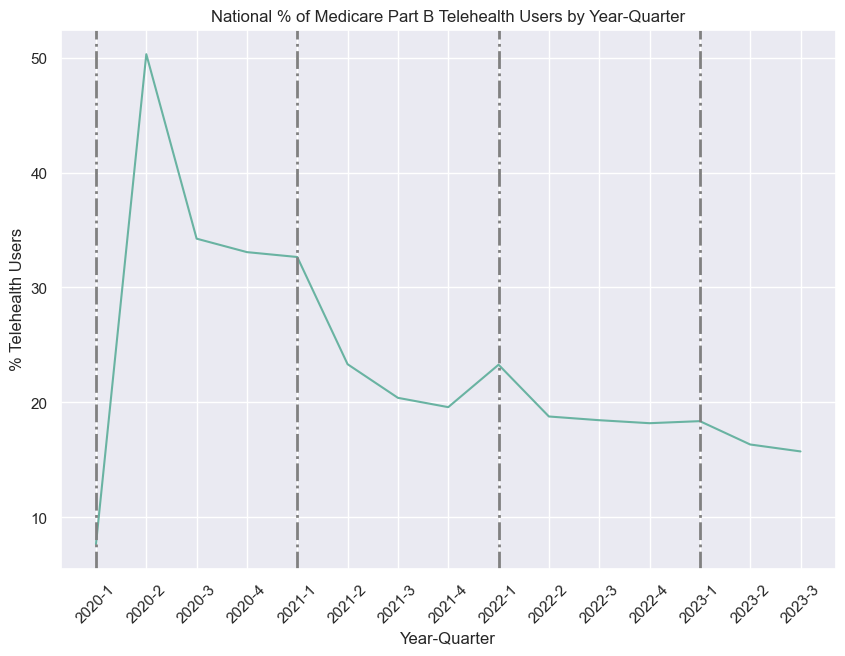

In [17]:
#Quick visualization of overall telehealth trends across the data set (National) from 2020-2023
#Filter df to all states 
value = 'National'
filtered_data = quick_filter(medicare_trends_df,state,value)

#Remove the 'Overall' yearly data and look at each quarter
data_by_quarter = filtered_data[filtered_data['quarter']!='Overall']
data_by_quarter

#Plot the chart in sns
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.lineplot(
    x="year-quarter",
    y="pct_actual_users_out_of_eligible_users",
    data=data_by_quarter, 
    color='#69b3a2', 
    ci=None);

#Add markers for year
plt.axvline(linewidth=2, linestyle='-.', color='grey', x='2020-1')
plt.axvline(linewidth=2, linestyle='-.', color='grey', x='2021-1')
plt.axvline(linewidth=2, linestyle='-.', color='grey', x='2022-1')
plt.axvline(linewidth=2, linestyle='-.', color='grey', x='2023-1')


#labels
plt.xticks(rotation=45)
plt.ylabel('% Telehealth Users')
plt.xlabel('Year-Quarter')
plt.title('National % of Medicare Part B Telehealth Users by Year-Quarter')

#Observation: Overall telehealth usage is declining year over year; why?

#### Medicaid Service Type Usage Year over Year

In [30]:
#Looking at number of users by telehealth type (year over year trends)
#Note these are national trends

service_counts_by_type_by_year = medicaid_trends_df.groupby(['TelehealthType','Year'])['ServiceCount'].sum().reset_index(name='sum').sort_values(by='TelehealthType', ascending=True)
service_counts_by_type_by_year
#I saved this data as a csv so I can make a good chart in Excel, 
#service_counts_by_type_by_year.to_csv('service_counts_by_type_by_year.csv')


#the excel chart reveals that live audio/video is by far the most used telehealth type
#by filtering that value out we can also see upward trends for store & forward and remote patient monitoring


,TelehealthType,Year,sum
0,Live audio/video,2018,2542113.0
1,Live audio/video,2019,3729677.0
2,Live audio/video,2020,101439571.0
3,Live audio/video,2021,104310821.0
4,Live audio/video,2022,80320959.0
8,Other telehealth,2021,356122.0
7,Other telehealth,2020,750035.0
9,Other telehealth,2022,281331.0
5,Other telehealth,2018,9750.0
6,Other telehealth,2019,17300.0


## 2. TN Medicare Demographic Trends
Telehealth trends are broken down by:
- Race
- Age
- Gender
- Eligibility
- Rural vs. Urban

#### Note: There are no demographic data about medicaid telehealth users, so I will only be looking at Medicare for now

### A. Race

In [18]:
#Filter by TN, remove "all" and 'other' (there are no values for "other" recorded)
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='All']
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='Other/Unknown']


#Save this to CSV for chart:
#filtered_data.to_csv('TN_Medicare_Race_Trends.csv')

#Group by race
medicare_trends_by_race = filtered_data.groupby(['Bene_Race_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='average_pct', ascending=False)
medicare_trends_by_race['average_pct'] = round(medicare_trends_by_race['average_pct'],2)
medicare_trends_by_race


,Bene_Race_Desc,average_pct
0,American Indian/Alaska Native,17.23
2,Black/African American,14.31
3,Hispanic,14.23
4,Non-Hispanic White,12.58
1,Asian/Pacific Islander,11.54


In [19]:
#Filter by TN, remove "all" and 'other' (there are no values for "other" recorded)
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='All']
filtered_data = filtered_data[filtered_data['Bene_Race_Desc']!='Other/Unknown']


#Save this to CSV for chart:
#filtered_data.to_csv('TN_Medicare_Race_Trends.csv')

#Group by race
medicare_trends_by_race = filtered_data.groupby(['Bene_Race_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='average_pct', ascending=False)
medicare_trends_by_race['average_pct'] = round(medicare_trends_by_race['average_pct'],2)
medicare_trends_by_race


,Bene_Race_Desc,average_pct
0,American Indian/Alaska Native,17.23
2,Black/African American,14.31
3,Hispanic,14.23
4,Non-Hispanic White,12.58
1,Asian/Pacific Islander,11.54


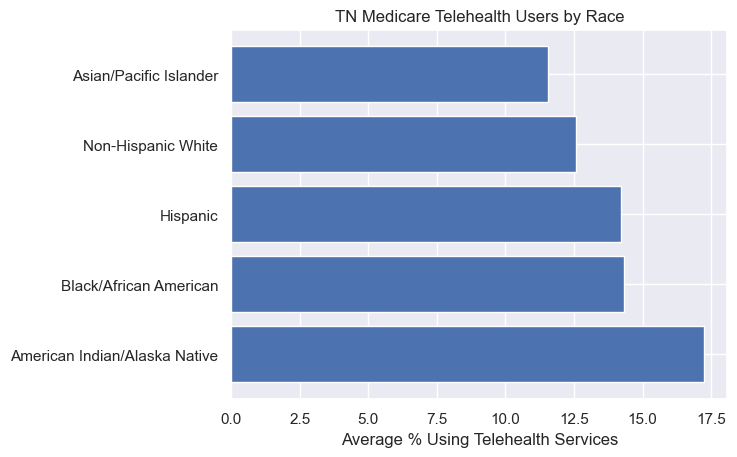

In [20]:
#Medicare Users by Race

#define data
height = medicare_trends_by_race['average_pct']
bars = medicare_trends_by_race['Bene_Race_Desc']
y_pos = np.arange(len(bars))

# Create bars
#plt.bar(y_pos, height)
plt.barh(bars, width=height)


# Create names on the x-axis and labels
plt.xlabel('Average % Using Telehealth Services')
#plt.ylabel('Race')
plt.title('TN Medicare Telehealth Users by Race')

# Show graphic
plt.show()

### B. Age

In [21]:
#Filter by TN, remove "all" 
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Age_Desc']!='All']

#Group by age
medicare_trends_by_age = filtered_data.groupby(['Bene_Age_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='Bene_Age_Desc', ascending=True)
medicare_trends_by_age['average_pct'] = round(medicare_trends_by_age['average_pct'],2)
medicare_trends_by_age

#Note that even though most medicare recipients are elderly/retired, most of the telehealth users are below 64

,Bene_Age_Desc,average_pct
0,0-64,24.05
1,65-74,11.74
2,75-84,10.89
3,85 and over,10.99


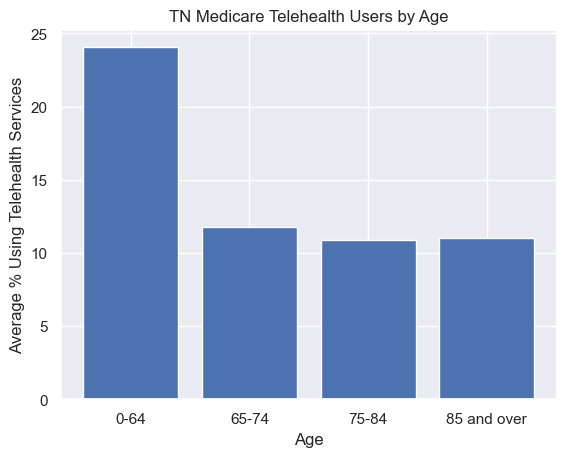

In [22]:
plt.bar(medicare_trends_by_age['Bene_Age_Desc'], medicare_trends_by_age['average_pct'])
# Create names on the x-axis and labels
plt.ylabel('Average % Using Telehealth Services')
plt.xlabel('Age')
plt.title('TN Medicare Telehealth Users by Age')

# Show graphic
plt.show()

### C. Gender

In [23]:
#Filter by TN, remove "all"
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Sex_Desc']!='All']

#Group by age
medicare_trends_by_gender = filtered_data.groupby(['Bene_Sex_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='average_pct', ascending=True)
medicare_trends_by_gender['average_pct'] = round(medicare_trends_by_gender['average_pct'],2)
medicare_trends_by_gender

#slightly more participation from female medicare recipients

,Bene_Sex_Desc,average_pct
1,Male,11.36
0,Female,13.78


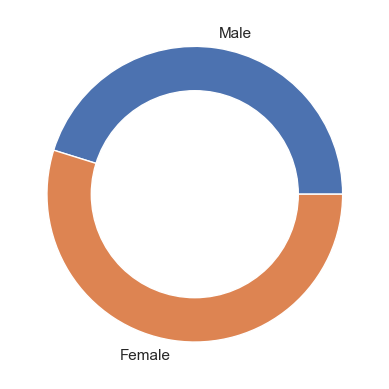

In [24]:
# doughnut chart example
names = medicare_trends_by_gender['Bene_Sex_Desc']
size = medicare_trends_by_gender['average_pct']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

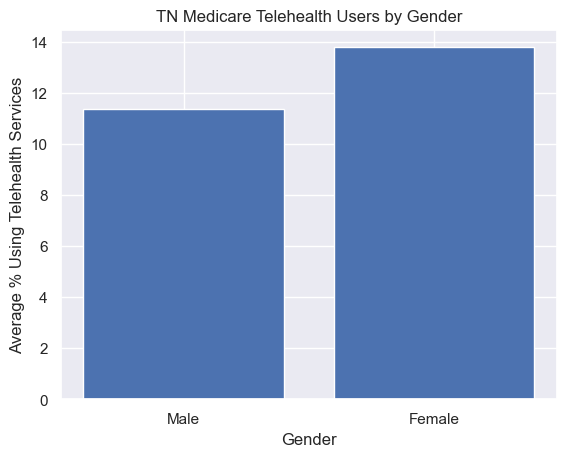

In [25]:
plt.bar(medicare_trends_by_gender['Bene_Sex_Desc'], medicare_trends_by_gender['average_pct'])
# Create names on the x-axis and labels
plt.ylabel('Average % Using Telehealth Services')
plt.xlabel('Gender')
plt.title('TN Medicare Telehealth Users by Gender')

# Show graphic
plt.show()

### D. Eligibility

In [42]:
filtered_data.groupby(['Bene_Mdcr_Entlmt_Stus'])['Bene_Mdcr_Entlmt_Stus'].value_counts().reset_index(name='count')

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users,year-quarter
173,2020,Overall,Tennessee,All,All,All,All,All,All,684874.0,700553.500000,212110.0,30.97,2020-Overall
226,2020,Overall,Tennessee,All,All,All,All,All,Rural,234605.0,239421.666670,66802.0,28.47,2020-Overall
277,2020,Overall,Tennessee,All,All,All,All,All,Urban,449498.0,460286.166670,145065.0,32.27,2020-Overall
328,2020,Overall,Tennessee,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2020-Overall
379,2020,Overall,Tennessee,All,All,All,All,0-64,All,88549.0,91824.166667,38250.0,43.20,2020-Overall


In [37]:
medicare_trends_df.Bene_Mdcr_Entlmt_Stus.unique()

array(['All', 'Aged', 'Disabled', 'ESRD'], dtype=object)

In [49]:
#Filter by TN, remove "all" and "Unknown" (there are no recorded values for "unknown")
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_Mdcr_Entlmt_Stus']!='All']

#Group by Entitlement
medicare_trends_by_entitlement = filtered_data.groupby(['Bene_Mdcr_Entlmt_Stus'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='average_pct', ascending=True)
medicare_trends_by_entitlement['average_pct'] = round(medicare_trends_by_entitlement['average_pct'],2)
medicare_trends_by_entitlement


,Bene_Mdcr_Entlmt_Stus,average_pct
0,Aged,11.29
2,ESRD,19.33
1,Disabled,24.31


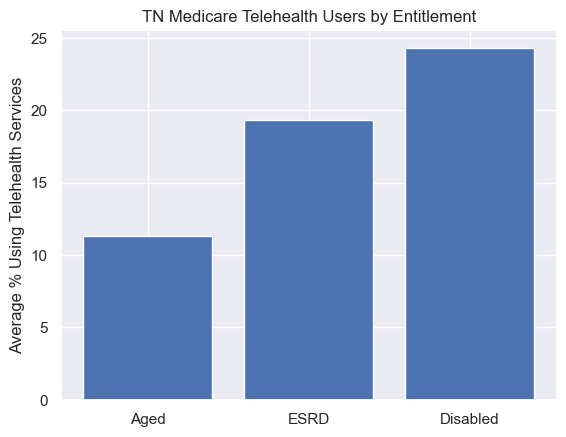

In [46]:
plt.bar(medicare_trends_by_entitlement['Bene_Mdcr_Entlmt_Stus'], medicare_trends_by_entitlement['average_pct'])
# Create names on the x-axis and labels
plt.ylabel('Average % Using Telehealth Services')
#plt.xlabel('Entitlement Reason')
plt.title('TN Medicare Telehealth Users by Entitlement')

# Show graphic
plt.show()

### E. Rural vs. Urban

In [27]:
#Filter by TN, remove "all" and "Unknown" (there are no recorded values for "unknown")
value = 'Tennessee'
filtered_data = quick_filter(medicare_trends_df,state,value)
filtered_data = filtered_data[filtered_data['Bene_RUCA_Desc']!='All']
filtered_data = filtered_data[filtered_data['Bene_RUCA_Desc']!='Unknown']

#Group by age
medicare_trends_by_RUCA = filtered_data.groupby(['Bene_RUCA_Desc'])['pct_actual_users_out_of_eligible_users'].mean().reset_index(name='average_pct').sort_values(by='average_pct', ascending=True)
medicare_trends_by_RUCA['average_pct'] = round(medicare_trends_by_RUCA['average_pct'],2)
medicare_trends_by_RUCA


,Bene_RUCA_Desc,average_pct
0,Rural,11.48
1,Urban,13.38


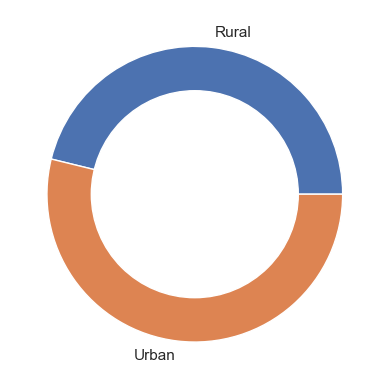

In [28]:
# doughnut chart example
names = medicare_trends_by_RUCA['Bene_RUCA_Desc']
size = medicare_trends_by_RUCA['average_pct']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

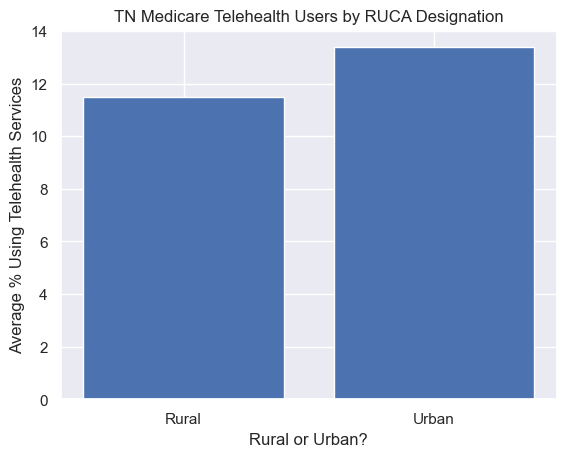

In [29]:
plt.bar(medicare_trends_by_RUCA['Bene_RUCA_Desc'], medicare_trends_by_RUCA['average_pct'])
# Create names on the x-axis and labels
plt.ylabel('Average % Using Telehealth Services')
plt.xlabel('Rural or Urban?')
plt.title('TN Medicare Telehealth Users by RUCA Designation')

# Show graphic
plt.show()

## 3. Mapping TN CHHS Trends

According to the TN Rural Health Care Task Force, rural residents are at particular risk for “poor health outcomes, including mental health challenges, obesity, and substance misuse”. 

78 of Tennessee's 95 counties are classified as rural (82%)

The focus of the analysis shall be on two risk factors: Mental Health and Obesity

Method: Analyze the correlation between healthcare accessibility factors and the various health factors within each topic (mental health and obesity). Where trends emerge, look for overlapping counties with multiple high risk variables

### Healthcare Accessibility 
Some variables that affect whether healthcare is accessible: 

- Available Providers (PCP or mental health)
    - Mental Health Providers
    - Primary Care Physicians
- Availability to go to doctor:
    - Children in Single Parent Household
    - Children in Poverty
	- Living Wage (can they afford)
    - Median Household Income
- Transportation (people who don’t have a car, need to find a dataset)
- Broadband Access
- Uninsured (overall, adults, and children)
 

### A. Mental Health

Quality of Life:
- Poor Mental Health Days
- Frequent Mental Distress

Health Factors:
- Insufficient Sleep
- Drug Overdose Deaths

Clinical Care: 
- Mental Health Providers*

Social & Economic Factors:
- Disconnected Youth
- Unemployment
- Suicides

Scatter plots everywhere

### B. Obesity 

Quality of Life:
- Diabetes Prevalence 

Health Factors:
- Adult Obesity
- Food Environment Index
- Physical Inactivity
- Food Insecurity

Clinical Care: 
- Primary Care Physicians


## 4. Telehealth Challenges 
- [Overview](https://www.countyhealthrankings.org/strategies-and-solutions/what-works-for-health/strategies/telemedicine)



- Broadband Access
- Uninsured (overall, adults, and children)
- Tech literacy (esp by age group) - no data set for this

# Part IV: Insights

Overall:
- National trend after covid is higher than before, although it has trended downward over last 3 years. 

Telehealth Types: 
- Live video/audio are by far the most used methods, however if we remove that variable you can see upwards trends in store & forward as well as remote patient monitoring. This suggests the focus is not just in how patients use technology but also how providers incorporate Telehealth into their available services. Adoption strategies may benefit from a focus on provider's technical literacy (not just patients)
- Policy may also play a role. Many rural populations rely on medicaid or medicare for health care. A 2020 report outlines state medicaid policies as one of the challenges in using telehealth to address opioid addiction. The report includes a state readiness assessment for implementing telehealth delivery methods. An assessment of TN’s readiness reveals a few gaps in coverage. For example, the CCHP (Center for Connected Health Policy) has a helpful policy map comparison that shows TN is behind other states in allowing medicaid reimbursement for remote patient monitoring as well as “Store and Forward” medical diagnostic processing. 

# Further Research

Many factors can play a role in health outcomes. The TN Department of Health has a webpage that outlines many contributing factors to poor health outcomes in rural populations.  Any of these could be explored further in the context of this analysis: 
 - average proximity to hospitals
  - food scarcity 
  - physical activeness trends 
  - internet or broadband access
  - health and nutrition literacy
  - social isolation levels
  - socioeconomic status by county

#### Additional Articles & Resources
- [Telehealth.HHS.gov](https://telehealth.hhs.gov/research-articles) - Additional research articles and papers on the impact and uses of telehealth, maintained by the HRSA Office for Advancement of Telehealth
- [CHRR Strategies for Telehealth](https://www.countyhealthrankings.org/strategies-and-solutions/what-works-for-health/strategies?keywords=telemedicine&sort_by=search_api_relevance) - Strategy guides with extensive research notes and citations. Includes evidence-informed strategies to create communities where everyone can thrive.
- [Additional CHRR Tennessee Data and Resources](https://www.countyhealthrankings.org/health-data/tennessee/data-and-resources) - These data sources provide information for communities looking for more local data. These sources provide either unique, local data; more information on demographic breakdowns (e.g., age, sex, race/ethnicity); or data for sub-county geographic units (e.g., cities, zipcodes or school districts).

## References (for me only)

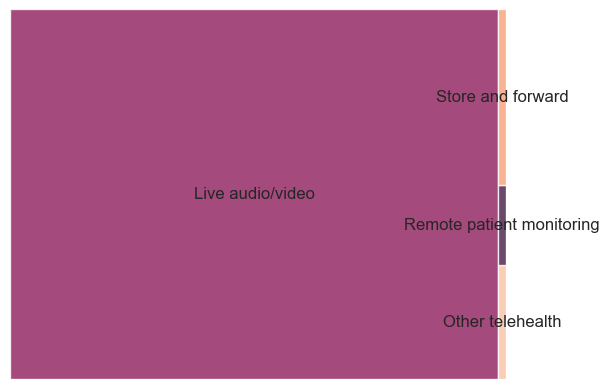

In [31]:
#Treemap (not very useful but keeping it for reference)
service_counts_by_type = medicaid_trends_df.groupby(['TelehealthType'])['ServiceCount'].sum().reset_index(name='sum').sort_values(by='TelehealthType', ascending=True)

# Create a data frame with fake data
#df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=service_counts_by_type['sum'], label=service_counts_by_type['TelehealthType'], alpha=.8 )
plt.axis('off')
plt.show()

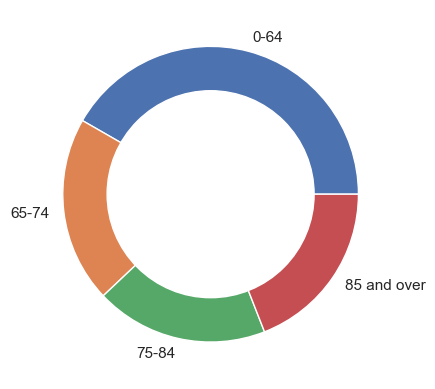

In [32]:
# doughnut chart example
names = medicare_trends_by_age['Bene_Age_Desc']
size = medicare_trends_by_age['average_pct']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

Groupby Example:
#Count the number of times each country occurs in the data frame using a groupby
#First indicate the column to group by (country)
#Then indicate the column to perform the calculation on (also country)
#Use value counts to count number of times each category occurs in df
#reset the index to turn the result into a dataframe and name the new column 'count'
#Finally sort values to get the list in order of count descending
top_countries = gourds.groupby(['country'])['country'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
top_countries
